In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

import pyomo.environ as pyo

from env.model import *
from env.utils import *
from functions import *

In [2]:
N = [20, 40, 60, 80, 100]
M = [8, 10, 12, 14]
for n in N:
    p = f'data/N_{n}'
    for i in range(10):
        delay, bw, speed = generate_network(n, i)
        if not os.path.isdir(p):
            os.makedirs(p)
        pickle.dump([delay, bw, speed], open(os.path.join(p, f'network_{n}_seed_{i}.pk'), 'wb'))
        
        for m in M:
            DAG, constraints = generate_program(m, n, i)
            pickle.dump([DAG, constraints], open(os.path.join(p, f'program_{m}_seed_{i}.pk'), 'wb'))
       

[14, 15]
[14, 3, 3, 1, 2, 1, 4, 15]
(762.3985136909521, [0, 6, 2, 4, 5, 7])


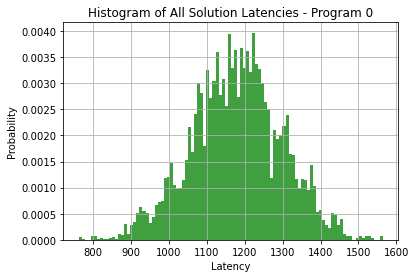

[10, 17]
[10, 4, 0, 18, 2, 18, 18, 17]
(835.5160808083606, [0, 1, 2, 6, 4, 5, 7])


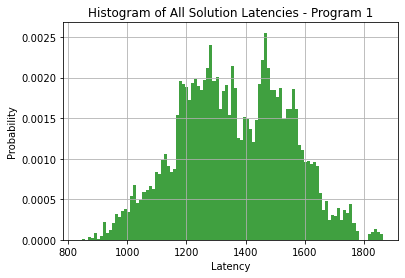

[8, 2]
[8, 5, 5, 2, 6, 6, 2, 2]
(452.6997244209407, [0, 4, 5, 2, 3, 6, 7])


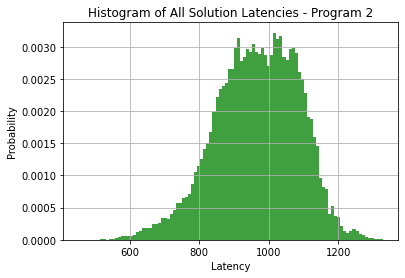

[1, 4]
[1, 13, 13, 13, 7, 4, 4, 4]
(650.7980718867245, [0, 1, 2, 3, 5, 6, 7])


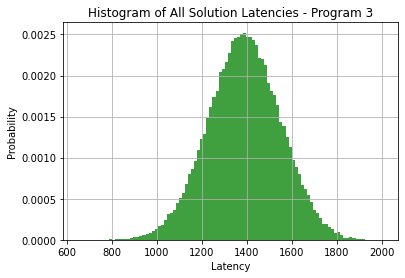

[9, 15]
[9, 5, 2, 2, 1, 2, 1, 15]
(689.6987891512118, [0, 1, 3, 4, 6, 7])


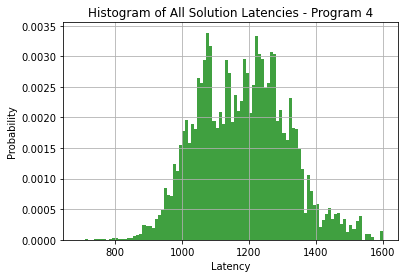

[13, 13]
[13, 2, 2, 2, 2, 13, 1, 13]
(621.7976886993373, [0, 1, 2, 3, 4, 6, 5, 7])


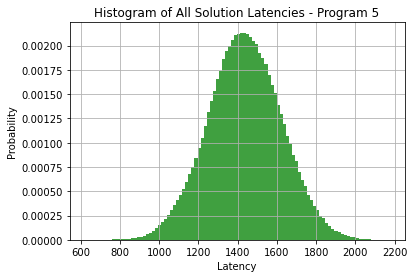

[12, 8]
[12, 4, 4, 1, 2, 1, 4, 8]
(768.4623780230382, [0, 1, 2, 6, 4, 5, 7])


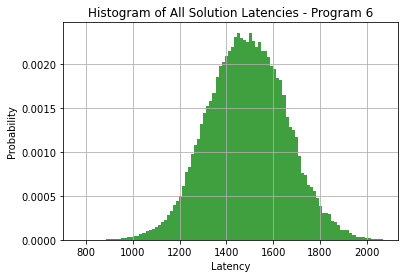

[19, 5]
[19, 8, 6, 6, 6, 6, 6, 5]
(464.7813505555619, [0, 1, 2, 3, 4, 5, 6, 7])


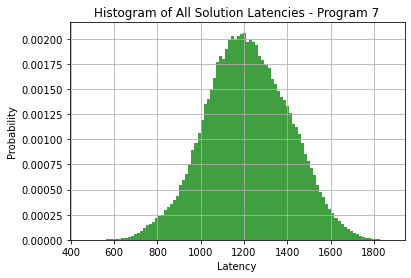

[1, 6]
[1, 17, 17, 13, 11, 11, 19, 6]
(579.3595159786645, [0, 1, 2, 3, 4, 5, 7])


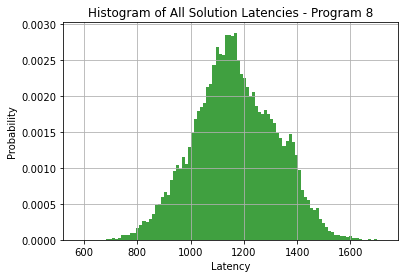

[2, 1]
[2, 2, 2, 2, 2, 18, 18, 1]
(573.9048761634918, [0, 1, 3, 4, 6, 5, 7])


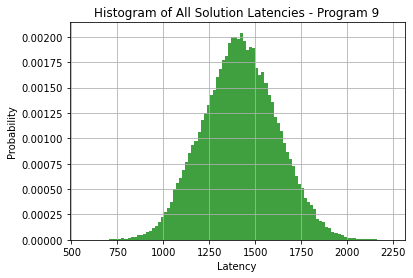

In [3]:
def get_config(n_devices, n_programs, s1=0, s2=[0]):
    p = f'data/N_{n_devices}'
    delay, bw, speed = pickle.load(open(os.path.join(p, f'network_{n_devices}_seed_{s1}.pk'), 'rb'))
    
    network = StarNetwork(delay, bw, speed)
    programs = []
    for seed in s2:
        DAG, constraints = pickle.load(open(os.path.join(p, f'program_{n_programs}_seed_{seed}.pk'), 'rb'))
        programs.append(Program(DAG, constraints, network))
    return network, programs

n = 20
m = 8
program_ids = list(range(10))
network, programs = get_config(n, m, s2=program_ids)

for i in program_ids:
    program = programs[i]
    mapping = np.zeros((m, n))
    mapping[0, program.pinned[0]] = 1
    mapping[-1, program.pinned[-1]] = 1
    print(program.pinned)
    mapp, Lat, solution = exhaustive(mapping, program, network)
    print([get_mapped_node(mapp, i) for i in range(m)])
    print(evaluate(mapp, program, network))
    plt.hist(solution, 100, density=True, facecolor='g', alpha=0.75)

    plt.xlabel('Latency')
    plt.ylabel('Probability')
    plt.title(f'Histogram of All Solution Latencies - Program {i}')
    plt.grid(True)
    plt.show()

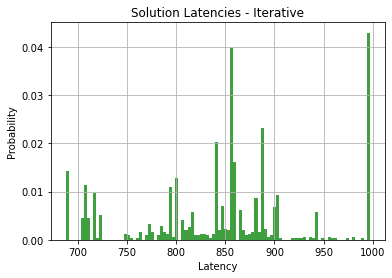

In [9]:

mapping = np.zeros((8, 40))
mapping[0, program[0].pinned[0]] = 1
mapping[-1, program[0].pinned[-1]] = 1
latency = []
for i in range(1000):
    mapp, lat = iterative(mapping, program[0], network)
    latency.append(lat)
plt.hist(latency, 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Latency')
plt.ylabel('Probability')
plt.title('Solution Latencies - Iterative')
plt.grid(True)
plt.show()

In [10]:
print([i for i in latency if i < 700])

[688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 687.7948361374523, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417, 688.7001349432417]


In [9]:
#40, 8, p3
mapp, Lat, solution = exhaustive(mapping, program, network)
print([get_mapped_node(mapp, i) for i in range(m)])
print(evaluate(mapp, program, network))

[22, 15, 37, 37, 10, 37, 37, 34]
(687.7948361374523, [0, 1, 4, 5, 6, 7])


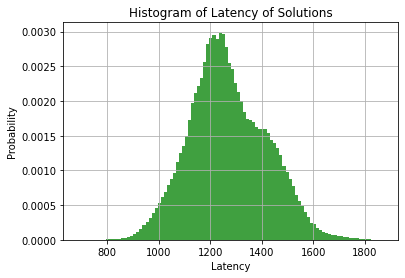

In [11]:
plt.hist(solution, 100, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Latency')
plt.ylabel('Probability')
plt.title('Histogram of Latency of Solutions')
plt.grid(True)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


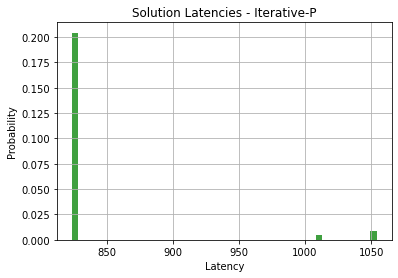

In [11]:
latency = []
for i in range(50):
    print(i)
    mapp, lat = iterative_qlp(mapping, program, network)
    latency.append(lat)
plt.hist(latency, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Latency')
plt.ylabel('Probability')
plt.title('Solution Latencies - Iterative-P')
plt.grid(True)
plt.show()

In [12]:
print(latency)

[823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 1009.2093479979678, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 1053.9758429467486, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 823.9512866394264, 1053.9758429467486, 823.9512866394264]


In [4]:
network, program = get_config(40, 8, s2=[3])

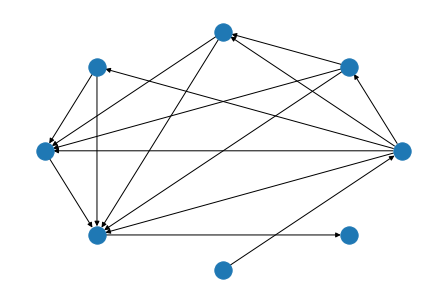

In [7]:
nx.draw_circular(program[0].P)
plt.show()